## Collect and Perform Initial Analysis on Datasets

Datasets for use in Counterterrorism model developed for Civil War class taught by Paul Staniland in Winter 2022 at the University of Chicago.

In [92]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
gate_gtd = pd.read_stata('./data/GATE_GTD_Israel_monthly_data_ext.dta')
gate_gtd.head()

,year,month,concil,repress,concdisc,concindisc,reprdisc,reprindisc,mcount,att93miss,...,r_atppl3,e_atppl3,s_atppl4,r_atppl4,e_atppl4,att_pal,att_unk,att_palunk,att_tot,_merge
0,1988.0,1.0,2.0,18.0,0.0,2.0,4.0,14.0,1960-09-01,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,master only (1)
1,1989.0,1.0,3.0,1.0,0.0,3.0,0.0,1.0,1961-09-01,9.0,...,NaN,NaN,NaN,NaN,NaN,4.0,5.0,9.0,11.0,matched (3)
2,1990.0,1.0,6.0,21.0,3.0,3.0,8.0,13.0,1962-09-01,14.0,...,NaN,NaN,NaN,NaN,NaN,9.0,5.0,14.0,14.0,matched (3)
3,1991.0,1.0,0.0,5.0,0.0,0.0,0.0,5.0,1963-09-01,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,master only (1)
4,1992.0,1.0,6.0,21.0,1.0,5.0,5.0,16.0,1964-09-01,7.0,...,NaN,NaN,NaN,NaN,NaN,7.0,0.0,7.0,8.0,matched (3)


In [86]:
gate_gtd[gate_gtd['year'].isna()]

,year,month,concil,repress,concdisc,concindisc,reprdisc,reprindisc,mcount,att93miss,...,r_atppl3,e_atppl3,s_atppl4,r_atppl4,e_atppl4,att_pal,att_unk,att_palunk,att_tot,_merge
211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,7.0,0.0,7.0,0.0,using only (2)


In [115]:
att_dates = gate_gtd[gate_gtd['year'].notna()]
att_dates['attack_date'] = pd.to_datetime(att_dates['year'].astype('int').astype('str') + '-' + att_dates['month'].astype('int').astype('str') + '-01')

att_dates = att_dates.loc[:,('att_palunk','att_pal','att_unk','attack_date')]
att_dates

/tmp/ipykernel_1140/3417524934.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  att_dates['attack_date'] = pd.to_datetime(att_dates['year'].astype('int').astype('str') + '-' + att_dates['month'].astype('int').astype('str') + '-01')


,att_palunk,att_pal,att_unk,attack_date
0,0.0,0.0,0.0,1988-01-01
1,9.0,4.0,5.0,1989-01-01
2,14.0,9.0,5.0,1990-01-01
3,0.0,0.0,0.0,1991-01-01
4,7.0,7.0,0.0,1992-01-01
...,...,...,...,...
206,3.0,0.0,3.0,2000-09-01
207,17.0,10.0,7.0,2001-09-01
208,2.0,2.0,0.0,2002-09-01
209,3.0,2.0,1.0,2003-09-01


In [119]:
att_dates_plt = att_dates.melt(id_vars=['attack_date'])
att_dates_plt.rename(columns={'variable':'actor','value':'attacks'},inplace=True)
att_dates_plt.head()

,attack_date,actor,attacks
0,1988-01-01,att_palunk,0.0
1,1989-01-01,att_palunk,9.0
2,1990-01-01,att_palunk,14.0
3,1991-01-01,att_palunk,0.0
4,1992-01-01,att_palunk,7.0


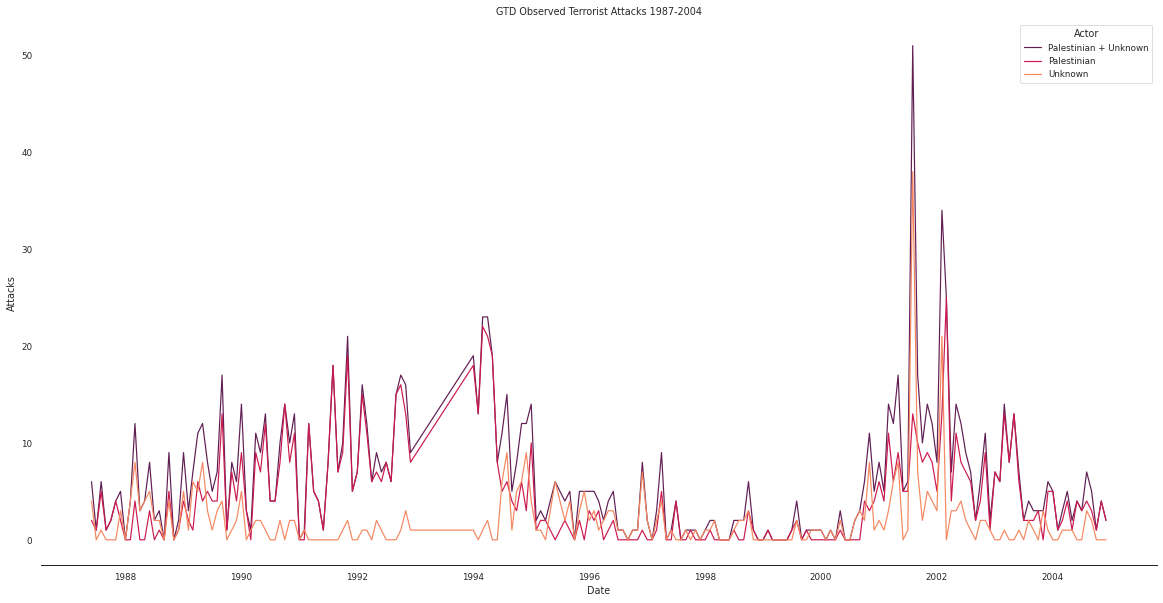

In [247]:
f, ax = plt.subplots(1,1,figsize=(20,10))
sns.set_style('white')
sns.despine(left=True)
sns.set_context('paper')
#palette = sns.color_palette('rocket',as_cmap=True)

sns.lineplot(data=att_dates_plt, x="attack_date", y="attacks", ax=ax, hue='actor',palette='rocket')
ax.set(ylabel="Attacks", xlabel="Date", title="GTD Observed Terrorist Attacks 1987-2004")
ax.legend(title="Actor", labels=['Palestinian + Unknown','Palestinian','Unknown'])
#att_dates.plot(x='mcount',y='att_palunk',ax=ax)

In [4]:
gate_gtd.columns

Index(['year', 'month', 'concil', 'repress', 'concdisc', 'concindisc',
       'reprdisc', 'reprindisc', 'mcount', 'att93miss', 'allact', 'allla',
       'concla', 'reprla', 'cdisla', 'cindla', 'rdisla', 'rindla', 'popthou',
       'att_popth', 'atppl1', 'atppl2', 'atppl3', 'atppl4', 'allla2',
       'concla2', 'reprla2', 'cdisla2', 'cindla2', 'rdisla2', 'rindla2',
       'firstint', 'secondint', 'GTD2', 'oslolull', 's_allla', 'r_allla',
       'e_allla', 's_firsti', 'r_firsti', 'e_firsti', 's_second', 'r_second',
       'e_second', 'GAM_mu', 's_concla', 'r_concla', 'e_concla', 's_reprla',
       'r_reprla', 'e_reprla', 's_GTD2', 'r_GTD2', 'e_GTD2', 's_atppl1',
       'r_atppl1', 'e_atppl1', 's_atppl2', 'r_atppl2', 'e_atppl2', 's_atppl3',
       'r_atppl3', 'e_atppl3', 's_atppl4', 'r_atppl4', 'e_atppl4', 'att_pal',
       'att_unk', 'att_palunk', 'att_tot', '_merge'],
      dtype='object')

In [9]:
gate_gtd_use = gate_gtd.loc[:,('year', 'month', 'concil', 'repress', 'concdisc', 'concindisc','reprdisc', 'reprindisc', 'mcount',\
    'firstint', 'secondint', 'GTD2', 'oslolull','att_pal','att_unk', 'att_palunk', 'att_tot', '_merge')]
gate_gtd_use.head()

,year,month,concil,repress,concdisc,concindisc,reprdisc,reprindisc,mcount,firstint,secondint,GTD2,oslolull,att_pal,att_unk,att_palunk,att_tot,_merge
0,1988.0,1.0,2.0,18.0,0.0,2.0,4.0,14.0,1960-09-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,master only (1)
1,1989.0,1.0,3.0,1.0,0.0,3.0,0.0,1.0,1961-09-01,1.0,0.0,0.0,0.0,4.0,5.0,9.0,11.0,matched (3)
2,1990.0,1.0,6.0,21.0,3.0,3.0,8.0,13.0,1962-09-01,1.0,0.0,0.0,0.0,9.0,5.0,14.0,14.0,matched (3)
3,1991.0,1.0,0.0,5.0,0.0,0.0,0.0,5.0,1963-09-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,master only (1)
4,1992.0,1.0,6.0,21.0,1.0,5.0,5.0,16.0,1964-09-01,1.0,0.0,0.0,0.0,7.0,0.0,7.0,8.0,matched (3)


Create visualization of government actions

In [240]:
actions_df = gate_gtd[gate_gtd['year'].notna()]
actions_df['month_date'] = pd.to_datetime(actions_df['year'].astype('int').astype('str') + '-' + actions_df['month'].astype('int').astype('str') + '-01')
actions_df = actions_df.loc[:,('month_date','concil','repress','concdisc','concindisc','reprdisc','reprindisc')]

/tmp/ipykernel_1140/803334586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actions_df['month_date'] = pd.to_datetime(actions_df['year'].astype('int').astype('str') + '-' + actions_df['month'].astype('int').astype('str') + '-01')


In [245]:
actions_df['month_date'].min()

Timestamp('1987-06-01 00:00:00')

In [241]:
actions_df_plt = actions_df.melt(id_vars=['month_date'])
actions_df_plt.rename(columns={'variable':'action_type','value':'actions'},inplace=True)
actions_df_plt.head()

,month_date,action_type,actions
0,1988-01-01,concil,2.0
1,1989-01-01,concil,3.0
2,1990-01-01,concil,6.0
3,1991-01-01,concil,0.0
4,1992-01-01,concil,6.0


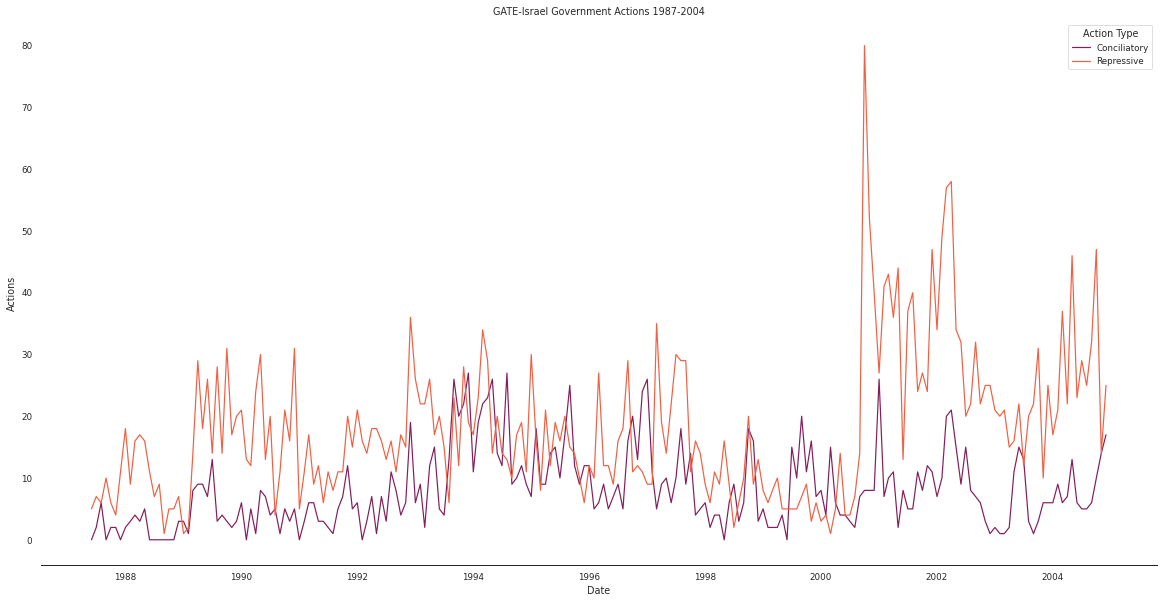

In [246]:
f, ax = plt.subplots(1,1,figsize=(20,10))
sns.set_style('white')
sns.despine(left=True)
sns.set_context('paper')

sns.lineplot(data=actions_df_plt[actions_df_plt['action_type'].isin(['concil','repress'])], x="month_date", \
    y="actions", ax=ax, hue='action_type',palette='rocket')
ax.set(ylabel="Actions", xlabel="Date", title="GATE-Israel Government Actions 1987-2004")
ax.legend(title="Action Type",labels=['Conciliatory','Repressive'])


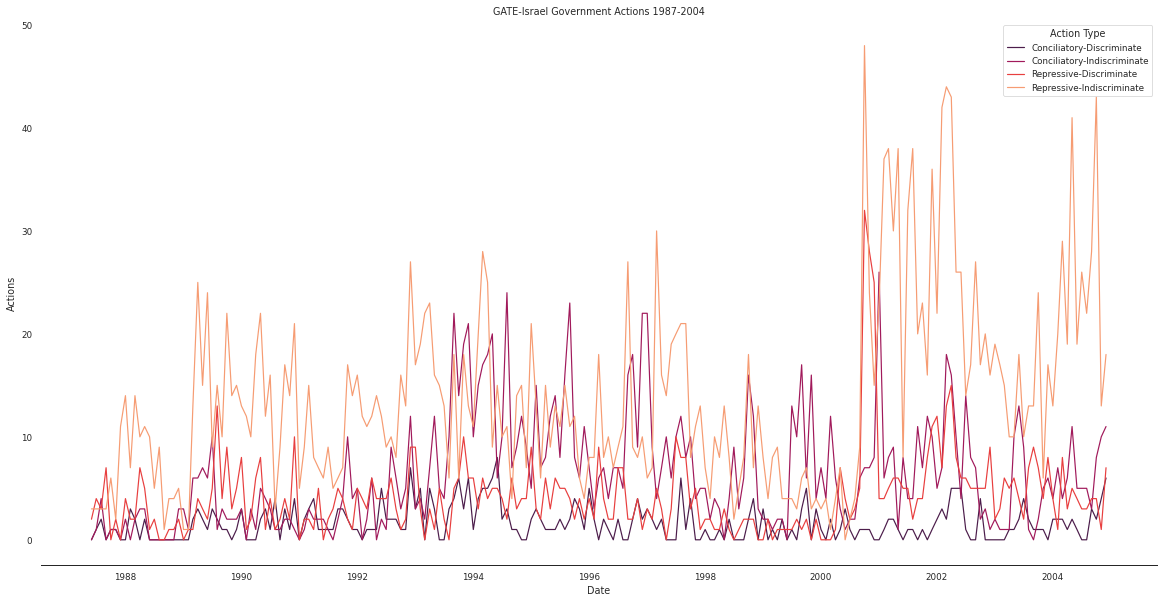

In [252]:
f, ax = plt.subplots(1,1,figsize=(20,10))
sns.set_style('white')
sns.despine(left=True)
sns.set_context('paper')

sns.lineplot(data=actions_df_plt[~actions_df_plt['action_type'].isin(['concil','repress'])], x="month_date", \
    y="actions", ax=ax, hue='action_type',palette='rocket')
ax.set(ylabel="Actions", xlabel="Date", title="GATE-Israel Government Actions 1987-2004")
ax.legend(title="Action Type",labels=['Conciliatory-Discriminate','Conciliatory-Indiscriminate','Repressive-Discriminate','Repressive-Indiscriminate'])

Load and process modeled results

In [20]:
full_models_df = pd.read_pickle('./data/full_models_df.pkl')
#full_models_df = pd.read_pickle("https://github.com/lsc4ss-a21/final-project-agent_based_counterterrorism/raw/master/midway_promising_models/full_models_df.pkl")

In [32]:
print(full_models_df.shape)
full_models_df.head()

(186500, 3)


,num_agents,num_attacks,params
0,400,73,"{'prob_violence': 0.001, 'govt_policy': 'CONC'..."
1,334,82,"{'prob_violence': 0.001, 'govt_policy': 'CONC'..."
2,332,98,"{'prob_violence': 0.001, 'govt_policy': 'CONC'..."
3,320,106,"{'prob_violence': 0.001, 'govt_policy': 'CONC'..."
4,318,122,"{'prob_violence': 0.001, 'govt_policy': 'CONC'..."


In [23]:
full_models_df['params'][0]

"{'prob_violence': 0.001, 'govt_policy': 'CONC', 'reactive_lvl': 'high', 'discontent': 'low', 'starting_population': 400, 'steps': 400}"

In [36]:
import ast

param_vals = {'prob_violence':[],'govt_policy':[],'reactive_lvl':[],'discontent':[],'starting_population':[],'steps':[]}
for params in full_models_df['params']:
    #print(params)
    #print(type(params))
    param_dict = ast.literal_eval(params)
    #print(param_dict)
    param_vals['prob_violence'].append(param_dict['prob_violence'])
    param_vals['govt_policy'].append(param_dict['govt_policy'])
    param_vals['reactive_lvl'].append(param_dict['reactive_lvl'])
    param_vals['discontent'].append(param_dict['discontent'])
    param_vals['starting_population'].append(param_dict['starting_population'])
    param_vals['steps'].append(param_dict['steps'])
len(param_vals)


6

In [38]:
params_df = pd.DataFrame.from_dict(param_vals)
params_df

,prob_violence,govt_policy,reactive_lvl,discontent,starting_population,steps
0,0.0010,CONC,high,low,400,400
1,0.0010,CONC,high,low,400,400
2,0.0010,CONC,high,low,400,400
3,0.0010,CONC,high,low,400,400
4,0.0010,CONC,high,low,400,400
...,...,...,...,...,...,...
186495,0.0005,NONE,high,high,300,200
186496,0.0005,NONE,high,high,300,200
186497,0.0005,NONE,high,high,300,200
186498,0.0005,NONE,high,high,300,200


In [39]:
full_model_results = full_models_df.join(params_df)
full_model_results.head()

,num_agents,num_attacks,params,prob_violence,govt_policy,reactive_lvl,discontent,starting_population,steps
0,400,73,"{'prob_violence': 0.001, 'govt_policy': 'CONC'...",0.001,CONC,high,low,400,400
1,334,82,"{'prob_violence': 0.001, 'govt_policy': 'CONC'...",0.001,CONC,high,low,400,400
2,332,98,"{'prob_violence': 0.001, 'govt_policy': 'CONC'...",0.001,CONC,high,low,400,400
3,320,106,"{'prob_violence': 0.001, 'govt_policy': 'CONC'...",0.001,CONC,high,low,400,400
4,318,122,"{'prob_violence': 0.001, 'govt_policy': 'CONC'...",0.001,CONC,high,low,400,400


In [48]:
full_model_results.shape

(186500, 9)

In [72]:
# identify models which result in 0 population
zero_fin_pop_params = full_model_results[full_model_results['num_agents'] == 0]['params'].unique()
len(zero_fin_pop_params)

274

In [257]:
# filter to exclude models which don't have any population by the end
full_potential_models = full_model_results[~full_model_results['params'].isin(zero_fin_pop_params)]
full_potential_models.shape

(80500, 9)

In [258]:
# create count of new attacks each step from cumulative counts in dataset
full_potential_models['new_attacks'] = full_potential_models.groupby('params')['num_attacks'].diff()
full_potential_models_skipfirst = full_potential_models.dropna()

/tmp/ipykernel_1140/187109999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_potential_models['new_attacks'] = full_potential_models.groupby('params')['num_attacks'].diff()


In [259]:
# create dummy dates to align with true data - considering whole 1988-2004 period
param_combos = full_potential_models_skipfirst['params'].unique()

for param in param_combos:
    param_df = full_potential_models_skipfirst[full_potential_models_skipfirst['params']==param]
    #print(param_df.index)
    full_potential_models_skipfirst.loc[param_df.index, 'dummy_date'] = pd.date_range(start='01/01/1988',end='09/01/2004',periods=param_df['steps'].mean() - 1)

full_potential_models_skipfirst.head()

/home/npodpx/venv/lib/python3.9/site-packages/pandas/core/indexing.py:1678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = empty_value
/home/npodpx/venv/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,num_agents,num_attacks,params,prob_violence,govt_policy,reactive_lvl,discontent,starting_population,steps,new_attacks,dummy_date
1601,314,93,"{'prob_violence': 0.001, 'govt_policy': 'CONC'...",0.001,CONC,none,low,400,400,2,1988-01-01 00:00:00.000000000
1602,316,96,"{'prob_violence': 0.001, 'govt_policy': 'CONC'...",0.001,CONC,none,low,400,400,3,1988-01-16 07:06:56.080402010
1603,320,105,"{'prob_violence': 0.001, 'govt_policy': 'CONC'...",0.001,CONC,none,low,400,400,9,1988-01-31 14:13:52.160804020
1604,316,107,"{'prob_violence': 0.001, 'govt_policy': 'CONC'...",0.001,CONC,none,low,400,400,2,1988-02-15 21:20:48.241206030
1605,318,109,"{'prob_violence': 0.001, 'govt_policy': 'CONC'...",0.001,CONC,none,low,400,400,2,1988-03-02 04:27:44.321608040


In [265]:
# filter out models which result in no attacks by the equivalent of the last 3 years
final_years_means = full_potential_models_skipfirst[full_potential_models_skipfirst['dummy_date'] >= '01-01-2001'].groupby(['params'])['new_attacks','num_attacks'].sum()
print(final_years_means.shape)
print(final_years_means[final_years_means['new_attacks'] != 0].shape)
attacks_at_end = final_years_means[final_years_means['new_attacks'] != 0].index
final_years_means.head()

(218, 2)
(175, 2)


/tmp/ipykernel_1140/651542232.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  final_years_means = full_potential_models_skipfirst[full_potential_models_skipfirst['dummy_date'] >= '01-01-2001'].groupby(['params'])['new_attacks','num_attacks'].sum()


,new_attacks,num_attacks
params,,
"{'prob_violence': 0.0001, 'govt_policy': 'CONC', 'reactive_lvl': 'high', 'discontent': 'high', 'starting_population': 600, 'steps': 200}",0,26884
"{'prob_violence': 0.0001, 'govt_policy': 'CONC', 'reactive_lvl': 'high', 'discontent': 'mid', 'starting_population': 400, 'steps': 400}",0,41184
"{'prob_violence': 0.0001, 'govt_policy': 'CONC', 'reactive_lvl': 'low', 'discontent': 'high', 'starting_population': 300, 'steps': 500}",0,52360
"{'prob_violence': 0.0001, 'govt_policy': 'CONC', 'reactive_lvl': 'low', 'discontent': 'high', 'starting_population': 400, 'steps': 400}",19,86607
"{'prob_violence': 0.0001, 'govt_policy': 'CONC', 'reactive_lvl': 'low', 'discontent': 'low', 'starting_population': 800, 'steps': 300}",192,89768


In [327]:
full_models = full_potential_models_skipfirst[full_potential_models_skipfirst['params'].isin(attacks_at_end)]
print(full_potential_models_skipfirst.shape)
full_models.shape

(80282, 11)


(62725, 11)

In [270]:
# total number of models under consideration
model_gb = full_model_results.groupby(by=['prob_violence','govt_policy','reactive_lvl','discontent','starting_population','steps']).mean()
print(model_gb.shape)
model_gb.head()

(492, 2)


/home/npodpx/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3251: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


num_agents  \
prob_violence govt_policy reactive_lvl discontent starting_population steps               
0.0001        CONC        high         high       400                 400        3.2375   
                                                  600                 200       13.6150   
                                       low        200                 300        6.0200   
                                                  400                 400        5.3925   
                                       mid        400                 400       19.3200   

                                                                             num_attacks  
prob_violence govt_policy reactive_lvl discontent starting_population steps               
0.0001        CONC        high         high       400                 400     412.697500  
                                                  600                 200     603.210000  
                                       low        200                 300     218.323333  
                                                  400                 400     415.515000  
                                       mid        400                 400     453.135000

In [271]:
# total models not resulting in 0 population or with no attacks at end
model_potential_gb = full_models.groupby(by=['prob_violence','govt_policy','reactive_lvl','discontent','starting_population','steps']).mean()
print(model_potential_gb.shape)
model_potential_gb.head()

(175, 4)


/home/npodpx/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3251: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


num_agents  \
prob_violence govt_policy reactive_lvl discontent starting_population steps               
0.0001        CONC        low          high       400                 400    110.942356   
                                       low        800                 300    244.792642   
                                       mid        400                 400    178.315789   
                          none         high       200                 500    373.549098   
                                                                      700    303.208870   

                                                                             num_attacks  \
prob_violence govt_policy reactive_lvl discontent starting_population steps                
0.0001        CONC        low          high       400                 400     723.684211   
                                       low        800                 300    1007.197324   
                                       mid        400                 400     589.934837   
                          none         high       200                 500     848.619238   
                                                                      700    1090.271817   

                                                                             new_attacks  \
prob_violence govt_policy reactive_lvl discontent starting_population steps                
0.0001        CONC        low          high       400                 400       1.989975   
                                       low        800                 300       4.280936   
                                       mid        400                 400       2.463659   
                          none         high       200                 500       4.521042   
                                                                      700       3.896996   

                                                                            dummy_date  
prob_violence govt_policy reactive_lvl discontent starting_population steps             
0.0001        CONC        low          high       400                 400   1996-05-02  
                                       low        800                 300   1996-05-02  
                                       mid        400                 400   1996-05-02  
                          none         high       200                 500   1996-05-02  
                                                                      700   1996-05-02

### Incorporate GTD Attacks

In [143]:
import numpy as np
from scipy.stats import ks_2samp

In [272]:
print(full_models.shape)
full_models.head()

(62725, 11)


,num_agents,num_attacks,params,prob_violence,govt_policy,reactive_lvl,discontent,starting_population,steps,new_attacks,dummy_date
1601,314,93,"{'prob_violence': 0.001, 'govt_policy': 'CONC'...",0.001,CONC,none,low,400,400,2,1988-01-01 00:00:00.000000000
1602,316,96,"{'prob_violence': 0.001, 'govt_policy': 'CONC'...",0.001,CONC,none,low,400,400,3,1988-01-16 07:06:56.080402010
1603,320,105,"{'prob_violence': 0.001, 'govt_policy': 'CONC'...",0.001,CONC,none,low,400,400,9,1988-01-31 14:13:52.160804020
1604,316,107,"{'prob_violence': 0.001, 'govt_policy': 'CONC'...",0.001,CONC,none,low,400,400,2,1988-02-15 21:20:48.241206030
1605,318,109,"{'prob_violence': 0.001, 'govt_policy': 'CONC'...",0.001,CONC,none,low,400,400,2,1988-03-02 04:27:44.321608040


In [328]:
# normalize each scenario's values
param_combos = full_models['params'].unique()

for param in param_combos:
    param_df = full_models[full_models['params']==param]
    #print(param_df.index)
    full_models.loc[param_df.index, 'new_attacks_norm'] = (param_df['new_attacks'] - \
    param_df['new_attacks'].mean()) / param_df['new_attacks'].std()

full_models.head()

/home/npodpx/venv/lib/python3.9/site-packages/pandas/core/indexing.py:1681: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = empty_value
/home/npodpx/venv/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,num_agents,num_attacks,params,prob_violence,govt_policy,reactive_lvl,discontent,starting_population,steps,new_attacks,dummy_date,new_attacks_norm
1601,314,93,"{'prob_violence': 0.001, 'govt_policy': 'CONC'...",0.001,CONC,none,low,400,400,2,1988-01-01 00:00:00.000000000,-0.778157
1602,316,96,"{'prob_violence': 0.001, 'govt_policy': 'CONC'...",0.001,CONC,none,low,400,400,3,1988-01-16 07:06:56.080402010,-0.598061
1603,320,105,"{'prob_violence': 0.001, 'govt_policy': 'CONC'...",0.001,CONC,none,low,400,400,9,1988-01-31 14:13:52.160804020,0.482511
1604,316,107,"{'prob_violence': 0.001, 'govt_policy': 'CONC'...",0.001,CONC,none,low,400,400,2,1988-02-15 21:20:48.241206030,-0.778157
1605,318,109,"{'prob_violence': 0.001, 'govt_policy': 'CONC'...",0.001,CONC,none,low,400,400,2,1988-03-02 04:27:44.321608040,-0.778157


In [329]:
# normalize GTD attack counts
att_dates['palunk_att_norm'] = (att_dates['att_palunk'] - \
    att_dates['att_palunk'].mean()) / att_dates['att_palunk'].std()
att_dates.head()

,att_palunk,att_pal,att_unk,attack_date,palunk_att_norm
0,0.0,0.0,0.0,1988-01-01,-0.964136
1,9.0,4.0,5.0,1989-01-01,0.407403
2,14.0,9.0,5.0,1990-01-01,1.169370
3,0.0,0.0,0.0,1991-01-01,-0.964136
4,7.0,7.0,0.0,1992-01-01,0.102617


In [330]:
obs_attacks = np.array(att_dates['palunk_att_norm'])
obs_attacks.shape

(211,)

In [331]:
# calculate K-S test statistics comparing modeled results with GTD
param_combos = full_models['params'].unique()
ks_results_stat = {}
ks_results_pval = {}

for param in param_combos:
    param_df = full_models[full_models['params'] == param]
    mod_np = np.array(param_df['new_attacks_norm'])
    #print('modeled attacks shape',mod_np.shape)
    ks_results = ks_2samp(obs_attacks, mod_np)
    ks_results_stat[param] = ks_results[0]
    ks_results_pval[ks_results[1]] = param
    

In [332]:
# 10% significance level
ks_results_p10 = [{val, key} for val, key in ks_results_pval.items() if val < 0.1]
print(len(ks_results_p10))
ks_results_p10[0:2]

60


[{2.4447347829231782e-18,
  "{'prob_violence': 0.005, 'govt_policy': 'REPR', 'reactive_lvl': 'none', 'discontent': 'low', 'starting_population': 400, 'steps': 400}"},
 {4.7353270744358953e-26,
  "{'prob_violence': 0.0001, 'govt_policy': 'REPR', 'reactive_lvl': 'none', 'discontent': 'high', 'starting_population': 400, 'steps': 400}"}]

In [333]:
# 5% significance level
ks_results_p05 = [{val, key} for val, key in ks_results_pval.items() if val < 0.05]
print(len(ks_results_p05))
ks_results_p05[0:2]

53


[{2.4447347829231782e-18,
  "{'prob_violence': 0.005, 'govt_policy': 'REPR', 'reactive_lvl': 'none', 'discontent': 'low', 'starting_population': 400, 'steps': 400}"},
 {4.7353270744358953e-26,
  "{'prob_violence': 0.0001, 'govt_policy': 'REPR', 'reactive_lvl': 'none', 'discontent': 'high', 'starting_population': 400, 'steps': 400}"}]

In [ ]:
# 1% significance level
ks_results_p01 = {val: key for val, key in ks_results_pval.items() if val < 0.01}
print(len(ks_results_p01))
ks_results_p01

In [ ]:
# .5% significance level
ks_results_p005 = {val: key for val, key in ks_results_pval.items() if val < 0.005}
print(len(ks_results_p01))
ks_results_p005

Exploratory analysis on model similarities

In [342]:
model_results_ks_good = full_models[full_models['params'].isin(ks_results_p01.values())]
model_results_ks_good['param_id'], uniques = pd.factorize(model_results_ks_good['params'])
model_results_ks_good['param_id'] = model_results_ks_good['param_id'] + 1
print(model_results_ks_good.shape)
model_results_ks_good.head(2)

(16458, 13)


/tmp/ipykernel_1140/2178090724.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_results_ks_good['param_id'], uniques = pd.factorize(model_results_ks_good['params'])
/tmp/ipykernel_1140/2178090724.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_results_ks_good['param_id'] = model_results_ks_good['param_id'] + 1


,num_agents,num_attacks,params,prob_violence,govt_policy,reactive_lvl,discontent,starting_population,steps,new_attacks,dummy_date,new_attacks_norm,param_id
10401,207,198,"{'prob_violence': 0.0005, 'govt_policy': 'CONC...",0.0005,CONC,none,high,400,400,2,1988-01-01 00:00:00.000000000,-0.615302,1
10402,207,199,"{'prob_violence': 0.0005, 'govt_policy': 'CONC...",0.0005,CONC,none,high,400,400,1,1988-01-16 07:06:56.080402010,-0.780181,1


In [352]:
model_results_ks_good.groupby('prob_violence')['param_id'].nunique()

prob_violence
0.0001    14
0.0005     4
0.0010     5
0.0030     5
0.0050     5
0.0080     9
Name: param_id, dtype: int64

In [353]:
model_results_ks_good.groupby('reactive_lvl')['param_id'].nunique()

reactive_lvl
low      4
none    38
Name: param_id, dtype: int64

In [354]:
model_results_ks_good.groupby('govt_policy')['param_id'].nunique()

govt_policy
CONC     8
NONE    21
REPR    13
Name: param_id, dtype: int64

In [355]:
model_results_ks_good.groupby('discontent')['param_id'].nunique()

discontent
high    12
low     12
mid     18
Name: param_id, dtype: int64

Examine remaining models to see if any mirror real attack patterns

In [295]:
att_dates.head()

,att_palunk,att_pal,att_unk,attack_date,palunk_att_norm
0,0.0,0.0,0.0,1988-01-01,-0.964136
1,9.0,4.0,5.0,1989-01-01,0.407403
2,14.0,9.0,5.0,1990-01-01,1.169370
3,0.0,0.0,0.0,1991-01-01,-0.964136
4,7.0,7.0,0.0,1992-01-01,0.102617


In [343]:
comp_obs_ks_att = att_dates.loc[:,('att_palunk','palunk_att_norm','attack_date')]
comp_obs_ks_att.rename(columns={'att_palunk':'num_attacks','palunk_att_norm': 'new_attacks_norm'},inplace=True)
comp_obs_ks_att['scenario'] = 0
model_ks_att = model_results_ks_good.loc[:,('new_attacks','dummy_date', 'param_id')].melt(id_vars=['dummy_date','param_id'])
model_ks_att.rename(columns={'value':'num_attacks','dummy_date':'attack_date','param_id':'scenario'},inplace=True)
model_ks_att.drop(columns=['variable'],inplace=True)

model_ks_att_norm = model_results_ks_good.loc[:,('new_attacks_norm','dummy_date', 'param_id')].melt(id_vars=['dummy_date','param_id'])
model_ks_att_norm.rename(columns={'value':'new_attacks_norm','dummy_date':'attack_date','param_id':'scenario'},inplace=True)
model_ks_att_norm.drop(columns=['variable'],inplace=True)
model_ks_att_comb = model_ks_att.merge(model_ks_att_norm, on=['attack_date','scenario'])
model_ks_att_comb.head()

comp_obs_ks_att = pd.concat([comp_obs_ks_att,model_ks_att_comb]).reset_index()
comp_obs_ks_att.head()

,index,num_attacks,new_attacks_norm,attack_date,scenario
0,0,0.0,-0.964136,1988-01-01,0
1,1,9.0,0.407403,1989-01-01,0
2,2,14.0,1.16937,1990-01-01,0
3,3,0.0,-0.964136,1991-01-01,0
4,4,7.0,0.102617,1992-01-01,0


In [381]:
# identify smallest p-value models
min_5 = sorted(list(ks_results_p01.keys()))[0:5]
min_5_params = [ks_results_p01[param] for param in min_5]
min_5_ids = model_results_ks_good[model_results_ks_good['params'].isin(min_5_params)]['param_id'].unique()
min_5_ids = np.insert(min_5_ids, obj=0,values=0)
min_5_ids

array([ 0, 12, 13, 27, 38, 42])

[Text(0, 0.5, 'Attacks'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'GTD Observed Terrorist Attacks 1988-2004')]

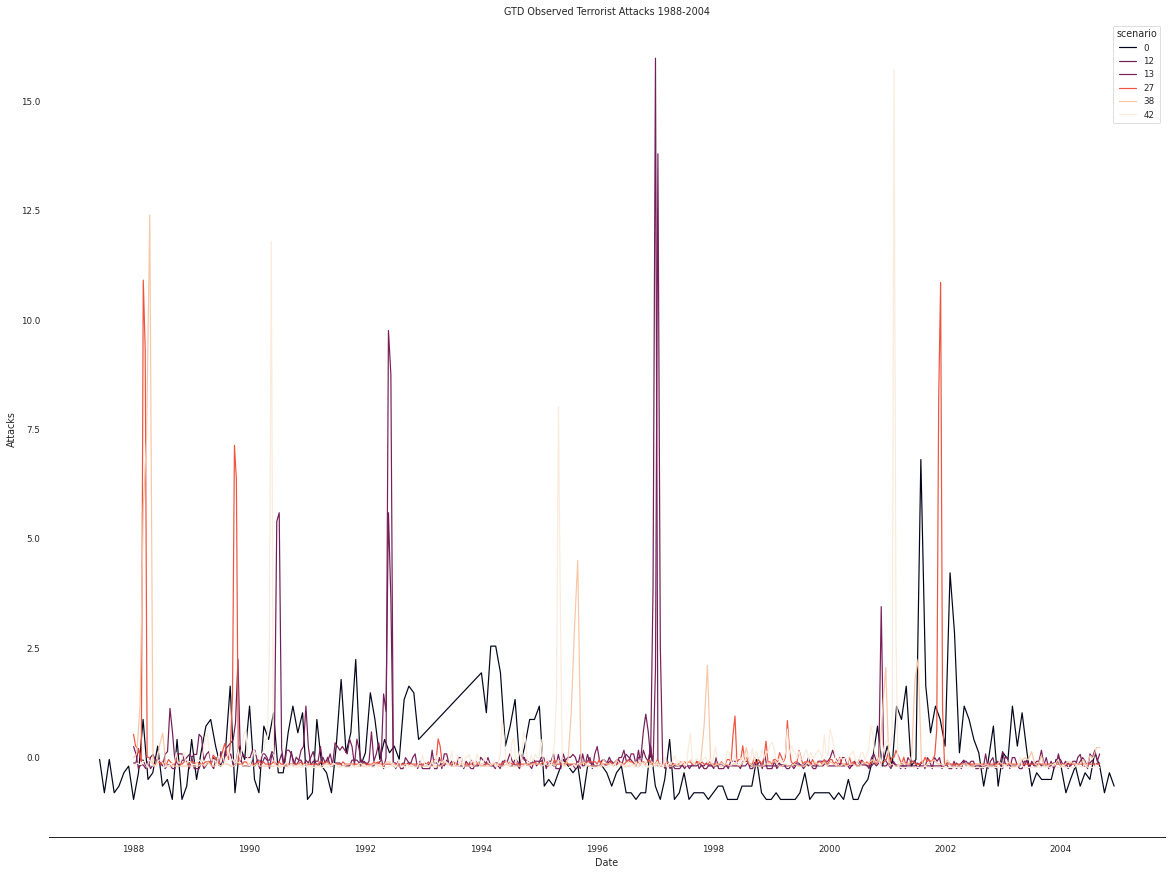

In [386]:
f, ax = plt.subplots(1,1,figsize=(20,15))
sns.set_style('white')
sns.despine(left=True)
sns.set_context('paper')

sns.lineplot(data=comp_obs_ks_att[comp_obs_ks_att['scenario'].isin(min_5_ids)], x="attack_date", y="new_attacks_norm", ax=ax, hue='scenario',palette='rocket')
ax.set(ylabel="Attacks", xlabel="Date", title="GTD Observed Terrorist Attacks 1988-2004")

In [384]:
# identify smallest p-value models
min_5_10 = sorted(list(ks_results_p01.keys()))[5:10]
min_5_10_params = [ks_results_p01[param] for param in min_5_10]
min_5_10_ids = model_results_ks_good[model_results_ks_good['params'].isin(min_5_10_params)]['param_id'].unique()
min_5_10_ids = np.insert(min_5_10_ids, obj=0,values=0)
min_5_10_ids

array([ 0,  9, 28, 30, 37, 41])

[Text(0, 0.5, 'Attacks'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'GTD Observed Terrorist Attacks 1988-2004')]

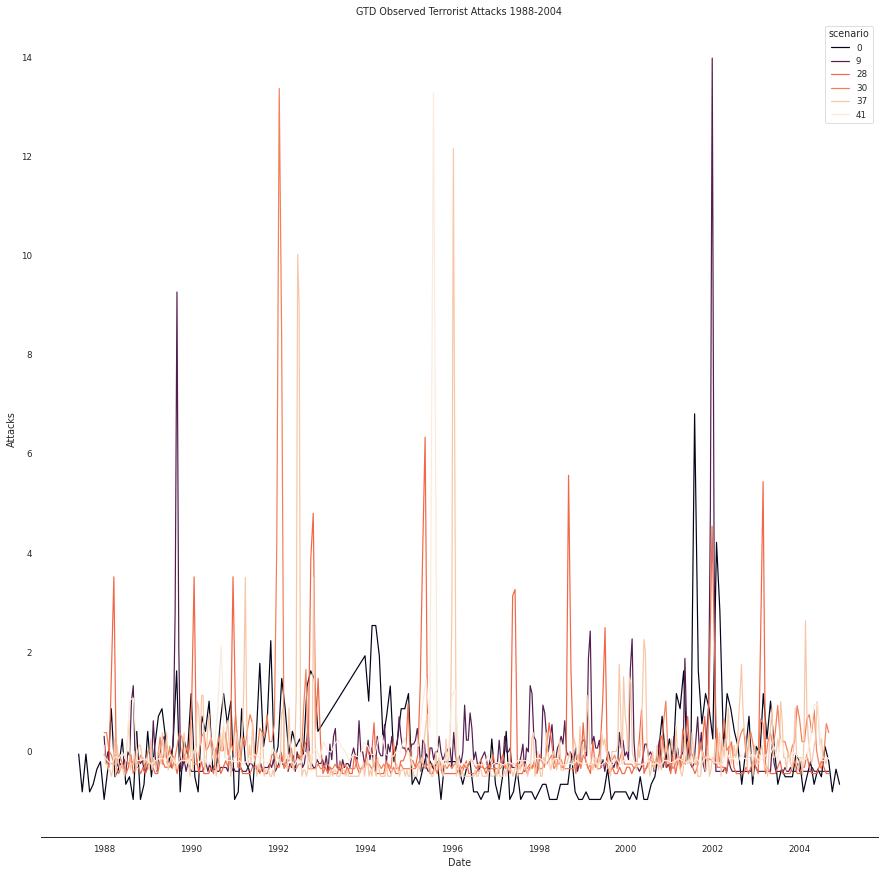

In [387]:
f, ax = plt.subplots(1,1,figsize=(15,15))
sns.set_style('white')
sns.despine(left=True)
sns.set_context('paper')

sns.lineplot(data=comp_obs_ks_att[comp_obs_ks_att['scenario'].isin(min_5_10_ids)], x="attack_date", y="new_attacks_norm", ax=ax, hue='scenario',palette='rocket')
ax.set(ylabel="Attacks", xlabel="Date", title="GTD Observed Terrorist Attacks 1988-2004")

In [520]:
sorted_keys = sorted(list(ks_results_p01.keys()))[30:]
sorted_params = [ks_results_p01[param] for param in sorted_keys]
sorted_ids = model_results_ks_good[model_results_ks_good['params'].isin(sorted_params)]['param_id'].unique()
#sorted_ids = np.insert(sorted_ids, obj=0,values=0)
sorted_ids

array([ 1,  5,  6,  8, 16, 17, 18, 20, 21, 22, 25, 33])

In [556]:
potential_ids = [0,8]

In [553]:
# bad example: using id 26, 12, 13, 27, 38, 41, 42, 19
# not as bad, but not good: 4,32,36,39,8

[Text(0, 0.5, 'Attacks'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'GTD Observed Terrorist Attacks 1988-2004')]

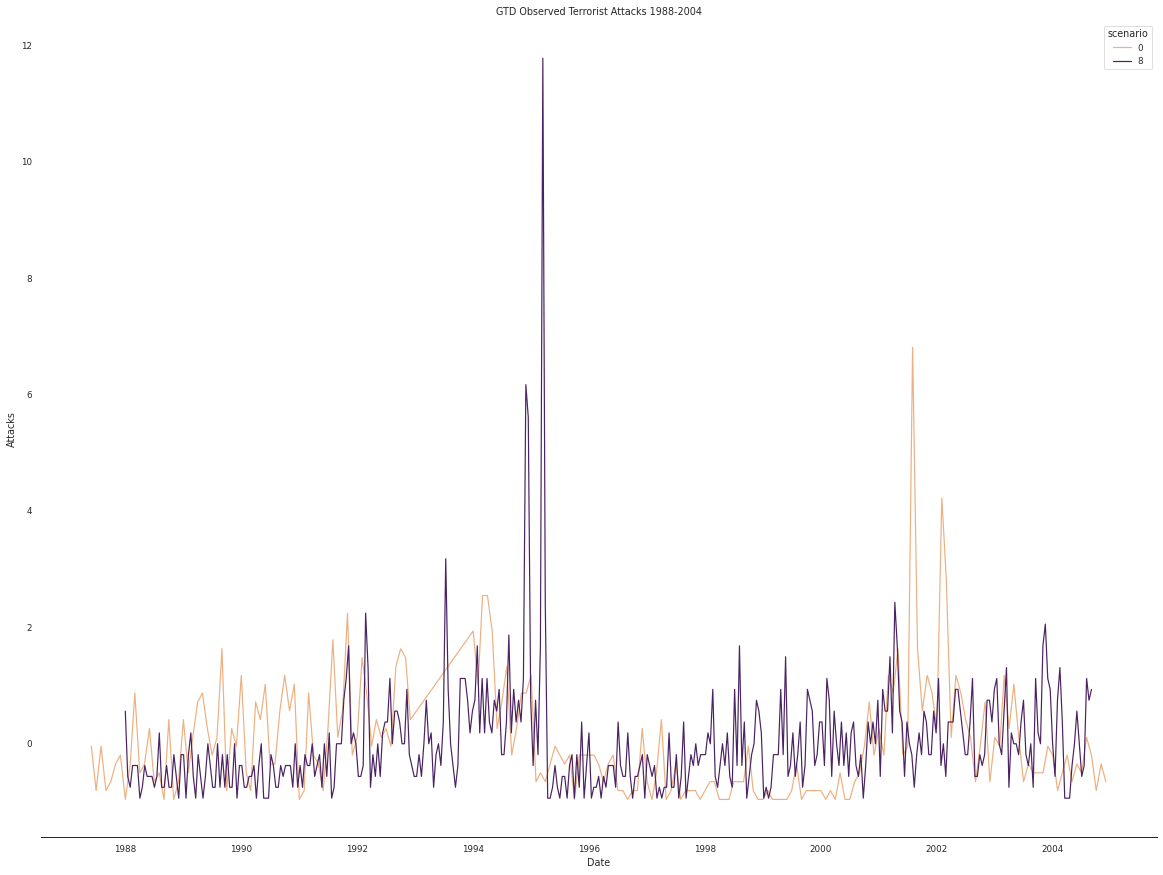

In [557]:
f, ax = plt.subplots(1,1,figsize=(20,15))
sns.set_style('white')
sns.despine(left=True)
sns.set_context('paper')
#palette = sns.color_palette('rocket',as_cmap=True)

# using 2,  maybe 30, 23, 34, 7, 10, 11,14,35, 6
sns.lineplot(data=comp_obs_ks_att[comp_obs_ks_att['scenario'].isin(potential_ids)], x="attack_date", y="new_attacks_norm", ax=ax, hue='scenario',palette='flare')
ax.set(ylabel="Attacks", xlabel="Date", title="GTD Observed Terrorist Attacks 1988-2004")

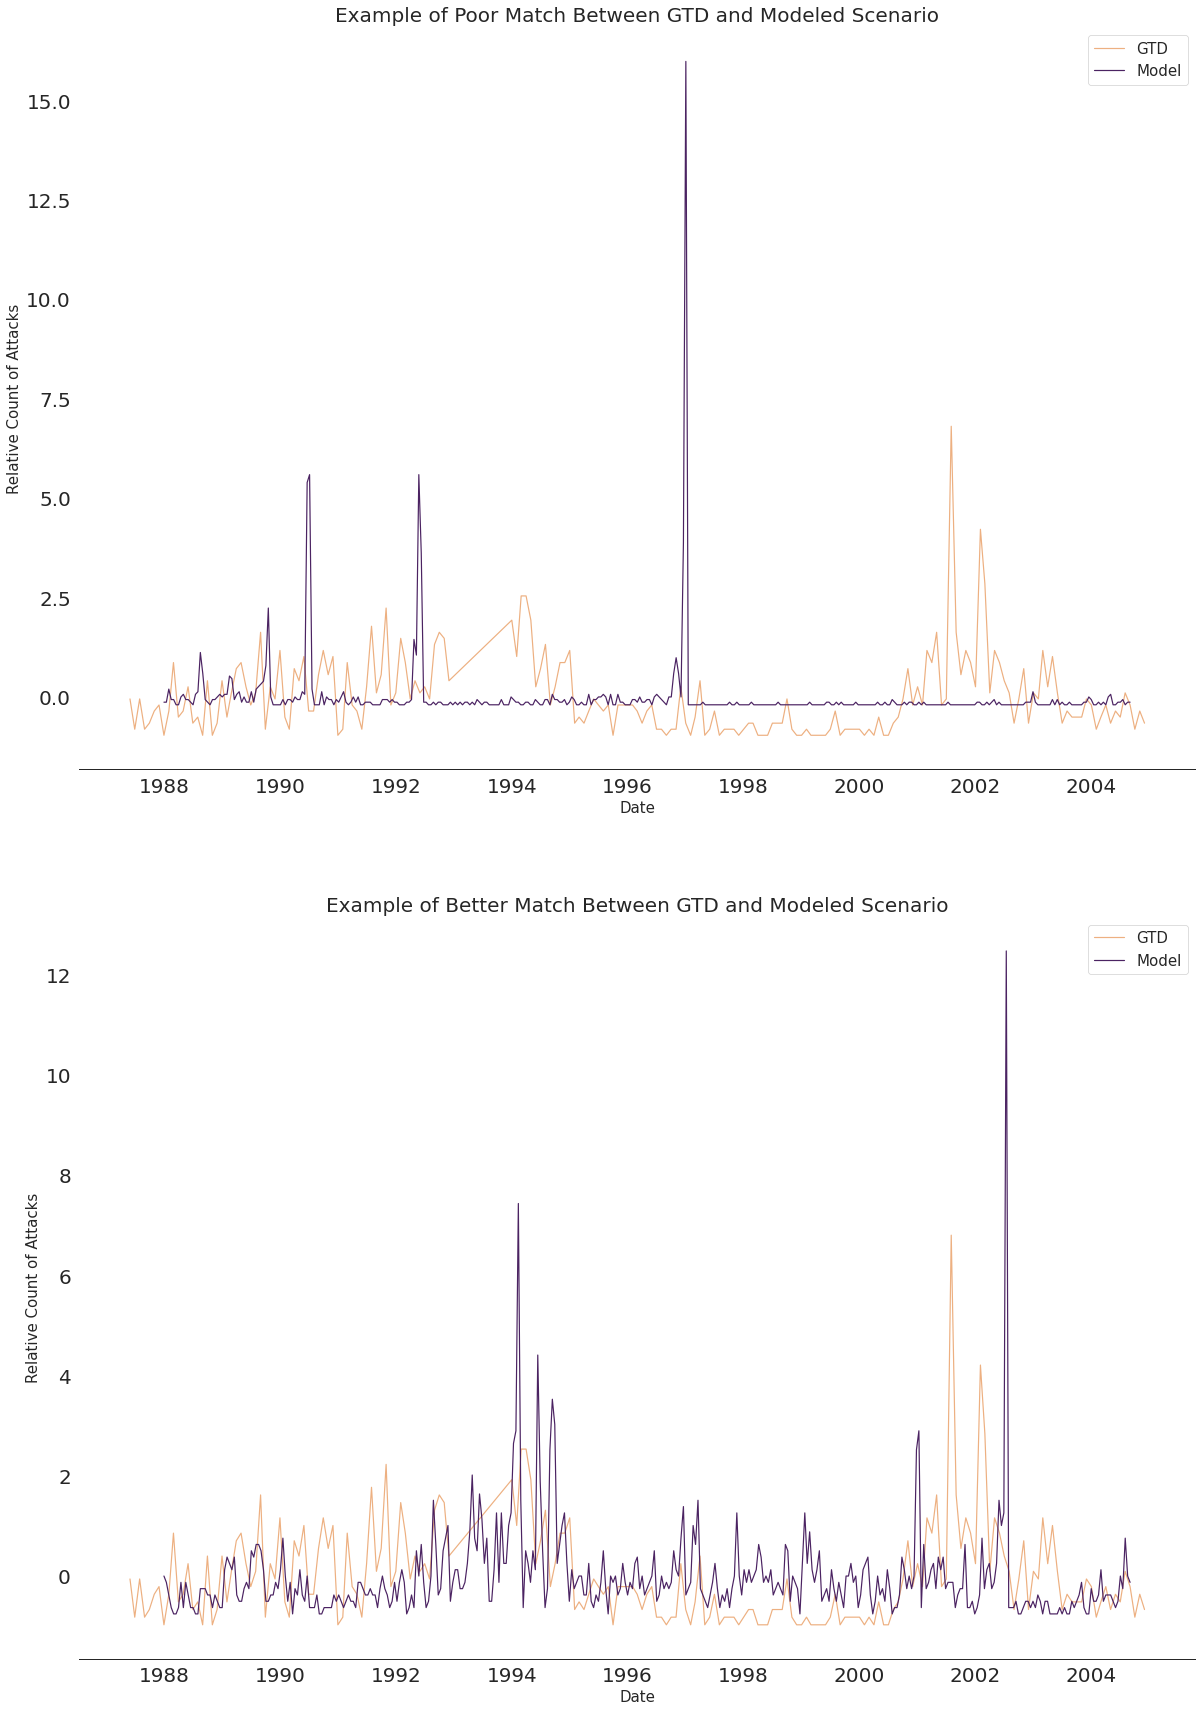

In [497]:
bad_eg = [0,12]
good_eg = [0,2]
f, ax = plt.subplots(2,1,figsize=(20,30))
sns.set_style('white')
sns.despine(left=True)
sns.set_context('paper')
plt.rc('legend',fontsize=15)

# using 2
sns.lineplot(data=comp_obs_ks_att[comp_obs_ks_att['scenario'].isin(bad_eg)], x="attack_date", \
    y="new_attacks_norm", ax=ax[0], hue='scenario',palette='flare')
sns.lineplot(data=comp_obs_ks_att[comp_obs_ks_att['scenario'].isin(good_eg)], x="attack_date", \
    y="new_attacks_norm", ax=ax[1], hue='scenario',palette='flare')
ax[0].set_ylabel('Relative Count of Attacks',fontsize=15)
ax[0].set_xlabel('Date',fontsize=15)
ax[0].set_title("Example of Poor Match Between GTD and Modeled Scenario",fontsize=20)
ax[0].legend(title="",labels=['GTD','Model'])

ax[1].set_ylabel('Relative Count of Attacks',fontsize=15)
ax[1].set_xlabel('Date',fontsize=15)
ax[1].set_title("Example of Better Match Between GTD and Modeled Scenario",fontsize=20)
ax[1].legend(title="",labels=['GTD','Model'])

ax[0].tick_params(labelsize=20)
ax[1].tick_params(labelsize=20)

Consider identified not good matches versus potentially alright matches by parameter selections

In [561]:
bad_ids = [26, 12, 13, 27, 38, 41, 42, 19]
model_results_ks_good[model_results_ks_good['param_id'].isin(bad_ids)]['params'].unique()
print(
    """
    Probability of violence: 
    {}
    Government policy: 
    {}
    Reactive Level: 
    {}
    Discontent: 
    {}
    """.format(
        model_results_ks_good[model_results_ks_good['param_id'].isin(bad_ids)].\
            groupby('prob_violence')['param_id'].nunique(),
        model_results_ks_good[model_results_ks_good['param_id'].isin(bad_ids)].\
            groupby('govt_policy')['param_id'].nunique(),
        model_results_ks_good[model_results_ks_good['param_id'].isin(bad_ids)].\
            groupby('reactive_lvl')['param_id'].nunique(),
        model_results_ks_good[model_results_ks_good['param_id'].isin(bad_ids)].\
            groupby('discontent')['param_id'].nunique()
    )
)


    Probability of violence: 
    prob_violence
0.0001    5
0.0030    1
0.0080    2
Name: param_id, dtype: int64
    Government policy: 
    govt_policy
CONC    3
NONE    1
REPR    4
Name: param_id, dtype: int64
    Reactive Level: 
    reactive_lvl
low     3
none    5
Name: param_id, dtype: int64
    Discontent: 
    discontent
high    2
low     1
mid     5
Name: param_id, dtype: int64
    


In [562]:
good_ids = [2, 30, 23, 34, 7, 10, 11,14,35, 6]
model_results_ks_good[model_results_ks_good['param_id'].isin(good_ids)]['params'].unique()
print(
    """
    Probability of violence: 
    {}
    Government policy: 
    {}
    Reactive Level: 
    {}
    Discontent: 
    {}
    """.format(
        model_results_ks_good[model_results_ks_good['param_id'].isin(good_ids)].\
            groupby('prob_violence')['param_id'].nunique(),
        model_results_ks_good[model_results_ks_good['param_id'].isin(good_ids)].\
            groupby('govt_policy')['param_id'].nunique(),
        model_results_ks_good[model_results_ks_good['param_id'].isin(good_ids)].\
            groupby('reactive_lvl')['param_id'].nunique(),
        model_results_ks_good[model_results_ks_good['param_id'].isin(good_ids)].\
            groupby('discontent')['param_id'].nunique()
    )
)


    Probability of violence: 
    prob_violence
0.0001    2
0.0005    2
0.0010    2
0.0030    1
0.0050    2
0.0080    1
Name: param_id, dtype: int64
    Government policy: 
    govt_policy
CONC    1
NONE    6
REPR    3
Name: param_id, dtype: int64
    Reactive Level: 
    reactive_lvl
none    10
Name: param_id, dtype: int64
    Discontent: 
    discontent
high    1
low     2
mid     7
Name: param_id, dtype: int64
    


Compare results of scenarios resulting in no attacks by end with above 'good' scenario

In [594]:
final_years_means = full_potential_models_skipfirst[full_potential_models_skipfirst['dummy_date'] >= '01-01-2001'].groupby(['params'])['new_attacks','num_attacks'].sum()
print(final_years_means.shape)
print(final_years_means[final_years_means['new_attacks'] == 0].shape)
noattacks_at_end = final_years_means[final_years_means['new_attacks'] == 0].index

(218, 2)
(43, 2)


/tmp/ipykernel_1140/2953874534.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  final_years_means = full_potential_models_skipfirst[full_potential_models_skipfirst['dummy_date'] >= '01-01-2001'].groupby(['params'])['new_attacks','num_attacks'].sum()


In [595]:
noattack_models = full_potential_models_skipfirst[full_potential_models_skipfirst['params'].isin(noattacks_at_end)]
print(full_potential_models_skipfirst.shape)
noattack_models.shape

(80282, 11)


(17557, 11)

In [599]:
# sample potentially promising model to compare against others which saw reduction to 0 attacks
model_results_ks_good[model_results_ks_good['param_id']==2]['params'].unique()

array(["{'prob_violence': 0.003, 'govt_policy': 'NONE', 'reactive_lvl': 'none', 'discontent': 'mid', 'starting_population': 400, 'steps': 400}"],
      dtype=object)

In [601]:
noattack_models[noattack_models['prob_violence']==0.003]['params'].unique()

array(["{'prob_violence': 0.003, 'govt_policy': 'CONC', 'reactive_lvl': 'mid-high', 'discontent': 'low', 'starting_population': 400, 'steps': 400}",
       "{'prob_violence': 0.003, 'govt_policy': 'CONC', 'reactive_lvl': 'mid-low', 'discontent': 'mid', 'starting_population': 400, 'steps': 400}",
       "{'prob_violence': 0.003, 'govt_policy': 'CONC', 'reactive_lvl': 'low', 'discontent': 'low', 'starting_population': 400, 'steps': 400}",
       "{'prob_violence': 0.003, 'govt_policy': 'CONC', 'reactive_lvl': 'mid-low', 'discontent': 'low', 'starting_population': 300, 'steps': 700}",
       "{'prob_violence': 0.003, 'govt_policy': 'CONC', 'reactive_lvl': 'low', 'discontent': 'mid', 'starting_population': 200, 'steps': 700}",
       "{'prob_violence': 0.003, 'govt_policy': 'CONC', 'reactive_lvl': 'low', 'discontent': 'mid', 'starting_population': 300, 'steps': 700}"],
      dtype=object)

In [602]:
noattack_models[noattack_models['govt_policy']=='NONE']['params'].unique()

array(["{'prob_violence': 0.001, 'govt_policy': 'NONE', 'reactive_lvl': 'low', 'discontent': 'high', 'starting_population': 400, 'steps': 400}"],
      dtype=object)

In [604]:
noattack_models[noattack_models['discontent']=='mid']['params'].unique()

array(["{'prob_violence': 0.003, 'govt_policy': 'CONC', 'reactive_lvl': 'mid-low', 'discontent': 'mid', 'starting_population': 400, 'steps': 400}",
       "{'prob_violence': 0.005, 'govt_policy': 'CONC', 'reactive_lvl': 'mid-high', 'discontent': 'mid', 'starting_population': 400, 'steps': 400}",
       "{'prob_violence': 0.0001, 'govt_policy': 'CONC', 'reactive_lvl': 'high', 'discontent': 'mid', 'starting_population': 400, 'steps': 400}",
       "{'prob_violence': 0.008, 'govt_policy': 'CONC', 'reactive_lvl': 'low', 'discontent': 'mid', 'starting_population': 400, 'steps': 400}",
       "{'prob_violence': 0.0005, 'govt_policy': 'CONC', 'reactive_lvl': 'mid-low', 'discontent': 'mid', 'starting_population': 300, 'steps': 200}",
       "{'prob_violence': 0.0005, 'govt_policy': 'CONC', 'reactive_lvl': 'low', 'discontent': 'mid', 'starting_population': 300, 'steps': 700}",
       "{'prob_violence': 0.001, 'govt_policy': 'CONC', 'reactive_lvl': 'mid-low', 'discontent': 'mid', 'starting_popul

### Optimal Transport - Not Functional

In [563]:
import ot

In [587]:
norm_attacks = (att_dates['att_palunk'] - \
    att_dates['att_palunk'].min()) / (att_dates['att_palunk'].max() - att_dates['att_palunk'].min() )
norm_attacks = np.array(norm_attacks)
norm_attacks[0:5]

array([0.        , 0.1764706 , 0.27450982, 0.        , 0.13725491],
      dtype=float32)

In [ ]:
obs_attacks = np.array(att_dates['palunk_att_norm'])
obs_attacks

In [586]:
param_df = full_models[full_models['params'] == param_combos[0]]
norm_mod_attacks = (param_df['new_attacks'] - \
    param_df['new_attacks'].min()) / (param_df['new_attacks'].max() - param_df['new_attacks'].min())
#mod_np = np.array(param_df['new_attacks_norm'])
norm_mod_attacks = np.array(norm_mod_attacks)
norm_mod_attacks[0:5]

array([0.06666666666666667, 0.1, 0.3, 0.06666666666666667,
       0.06666666666666667], dtype=object)

In [574]:
print(obs_attacks.shape)
mod_np.shape

(211,)


(399,)

In [575]:
mod_np[:211].shape

(211,)

In [589]:
w1d = ot.wasserstein_1d(norm_attacks, norm_mod_attacks[:211])
w1d

nan

In [593]:
from scipy import stats
dist1 = range(len(norm_attacks))
dist2 = range(len(norm_mod_attacks))
stats.wasserstein_distance(norm_attacks, norm_mod_attacks)

nan

In [ ]:
param_combos = full_models['params'].unique()
ot_results = {}
ks_results_pval = {}

for param in param_combos:
    param_df = full_models[full_models['params'] == param]
    mod_np = np.array(param_df['new_attacks_norm'])
    #print('modeled attacks shape',mod_np.shape)
    ks_results = ks_2samp(obs_attacks, mod_np)
    ks_results_stat[param] = ks_results[0]
    ks_results_pval[ks_results[1]] = param
    

Miscellaneous Graphs and Analysis

[Text(0, 0.5, 'Attacks'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'GTD Observed Terrorist Attacks 1988-2004')]

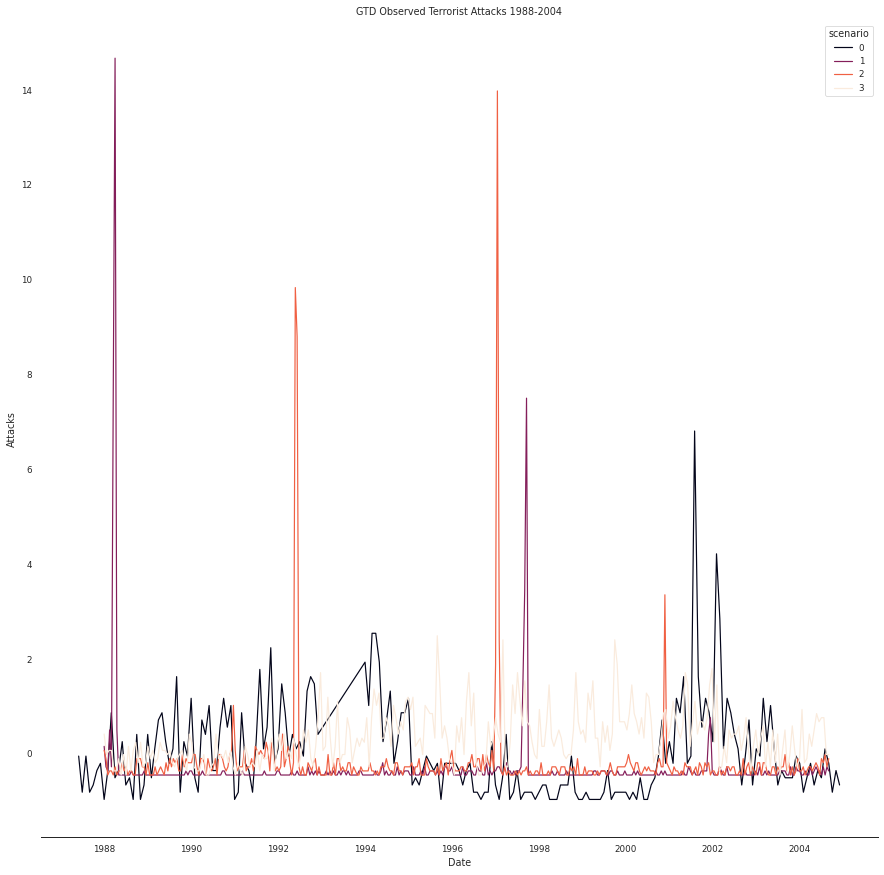

In [304]:
f, ax = plt.subplots(1,1,figsize=(15,15))
sns.set_style('white')
sns.despine(left=True)
sns.set_context('paper')
#palette = sns.color_palette('rocket',as_cmap=True)

sns.lineplot(data=comp_obs_ks_att[comp_obs_ks_att['scenario'] < 4], x="attack_date", y="new_attacks_norm", ax=ax, hue='scenario',palette='rocket')
ax.set(ylabel="Attacks", xlabel="Date", title="GTD Observed Terrorist Attacks 1988-2004")

[Text(0, 0.5, 'Attacks'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'GTD Observed Terrorist Attacks 1988-2004')]

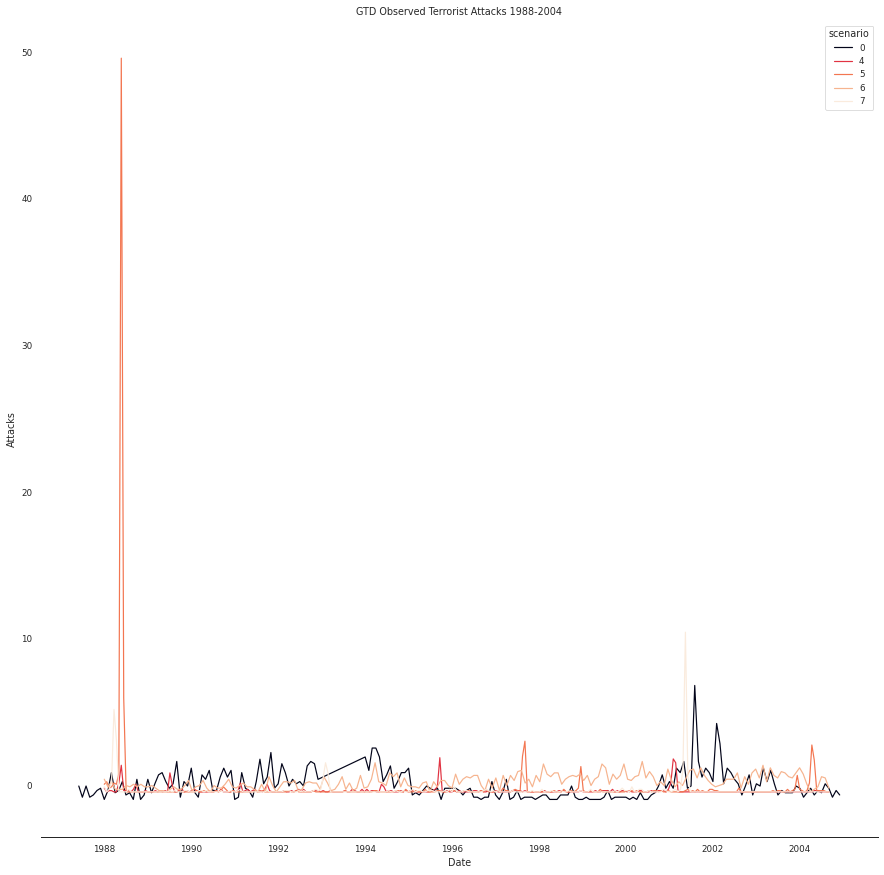

In [305]:
f, ax = plt.subplots(1,1,figsize=(15,15))
sns.set_style('white')
sns.despine(left=True)
sns.set_context('paper')
#palette = sns.color_palette('rocket',as_cmap=True)

# 11 not good
sns.lineplot(data=comp_obs_ks_att[((comp_obs_ks_att['scenario'] >= 4) & \
    (comp_obs_ks_att['scenario'] < 8)) | (comp_obs_ks_att['scenario'] == 0)], \
    x="attack_date", y="new_attacks_norm", ax=ax, hue='scenario',palette='rocket')
ax.set(ylabel="Attacks", xlabel="Date", title="GTD Observed Terrorist Attacks 1988-2004")

[Text(0, 0.5, 'Attacks'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'GTD Observed Terrorist Attacks 1988-2004')]

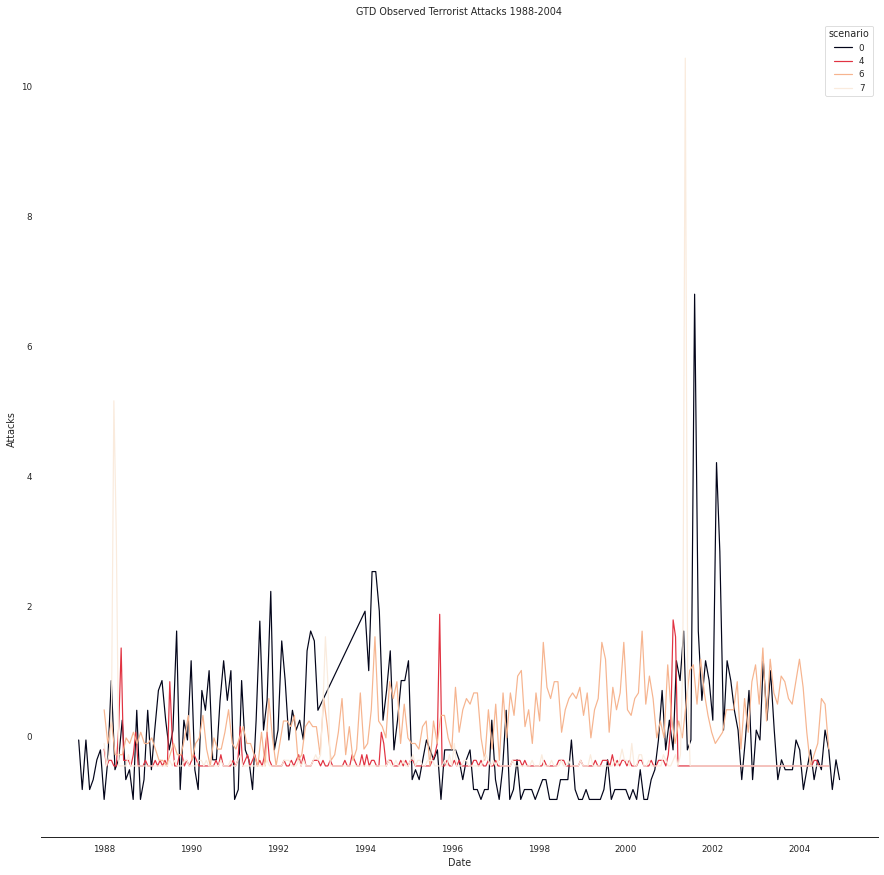

In [309]:
f, ax = plt.subplots(1,1,figsize=(15,15))
sns.set_style('white')
sns.despine(left=True)
sns.set_context('paper')
#palette = sns.color_palette('rocket',as_cmap=True)

# 11 not good
sns.lineplot(data=comp_obs_ks_att[((comp_obs_ks_att['scenario'] >= 6) & \
    (comp_obs_ks_att['scenario'] < 8)) | (comp_obs_ks_att['scenario'] == 0) | (comp_obs_ks_att['scenario'] == 4)], \
    x="attack_date", y="new_attacks_norm", ax=ax, hue='scenario',palette='rocket')
ax.set(ylabel="Attacks", xlabel="Date", title="GTD Observed Terrorist Attacks 1988-2004")

[Text(0, 0.5, 'Attacks'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'GTD Observed Terrorist Attacks 1988-2004')]

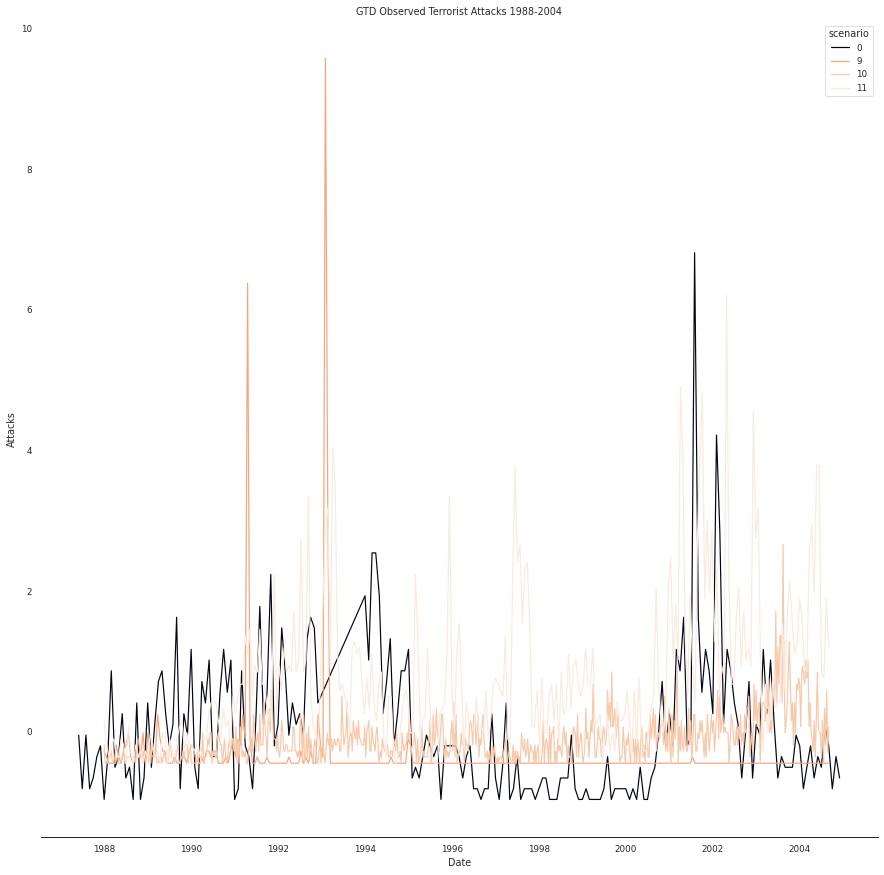

In [310]:
f, ax = plt.subplots(1,1,figsize=(15,15))
sns.set_style('white')
sns.despine(left=True)
sns.set_context('paper')
#palette = sns.color_palette('rocket',as_cmap=True)

# 8 not great
sns.lineplot(data=comp_obs_ks_att[((comp_obs_ks_att['scenario'] >= 9) & \
    (comp_obs_ks_att['scenario'] < 12)) | (comp_obs_ks_att['scenario'] == 0)], \
    x="attack_date", y="new_attacks_norm", ax=ax, hue='scenario',palette='rocket')
ax.set(ylabel="Attacks", xlabel="Date", title="GTD Observed Terrorist Attacks 1988-2004")

[Text(0, 0.5, 'Attacks'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'GTD Observed Terrorist Attacks 1988-2004')]

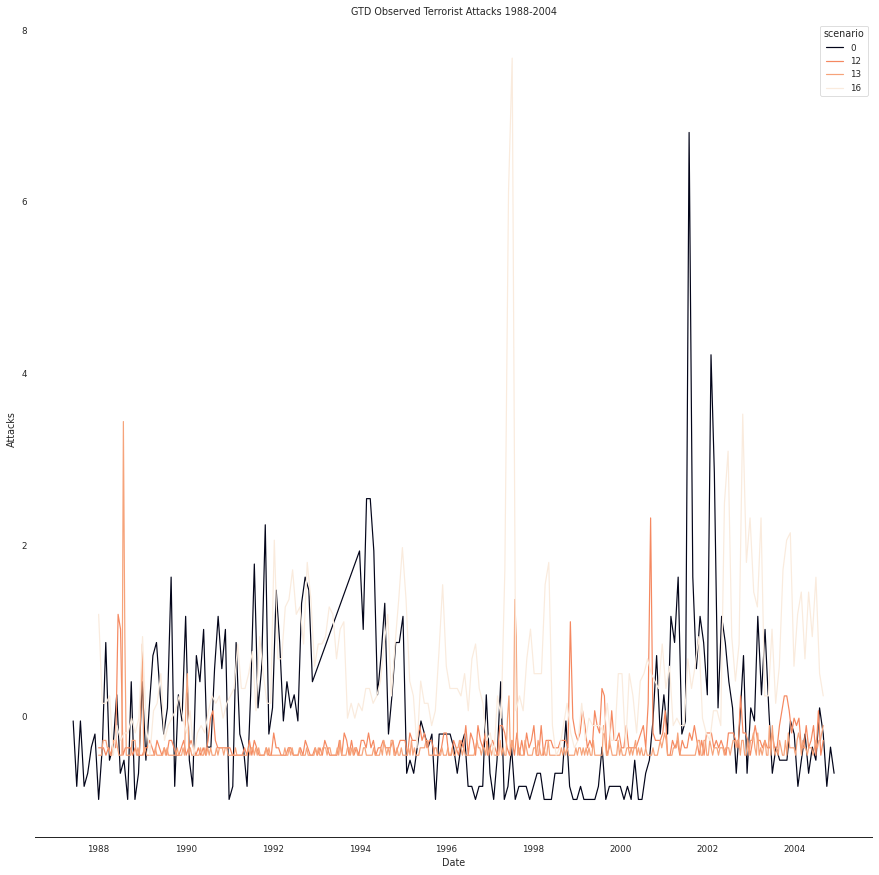

In [312]:
f, ax = plt.subplots(1,1,figsize=(15,15))
sns.set_style('white')
sns.despine(left=True)
sns.set_context('paper')
#palette = sns.color_palette('rocket',as_cmap=True)

# 15, 14 not good
sns.lineplot(data=comp_obs_ks_att[((comp_obs_ks_att['scenario'] >= 12) & \
    (comp_obs_ks_att['scenario'] < 14)) | (comp_obs_ks_att['scenario'] == 0) | (comp_obs_ks_att['scenario'] == 16)], \
    x="attack_date", y="new_attacks_norm", ax=ax, hue='scenario',palette='rocket')
ax.set(ylabel="Attacks", xlabel="Date", title="GTD Observed Terrorist Attacks 1988-2004")

Consider sorting model results by period - unused in current analysis, potentially interesting for future

In [232]:
# create dummy dates to align with true data  - separating by period
param_ks_combos = model_results_ks_good['params'].unique()
model_results_ks_good_period = model_results_ks_good.drop(columns=['dummy_date','param_id'])

i = 1
for param in param_ks_combos:
    param_df = model_results_ks_good_period[model_results_ks_good_period['params']==param]
    govt_policy = param_df['govt_policy'].unique()[0]
    if govt_policy == 'CONC':
        dummy_dates = pd.date_range(start='09/01/1993',end='08/31/2000',periods=param_df['steps'].mean() - 1)
    elif govt_policy == 'NONE':
        dummy_dates = pd.date_range(start='01/01/1988',end='08/31/1993',periods=param_df['steps'].mean() - 1)
    else:
        dummy_dates = pd.date_range(start='09/01/2000',end='09/01/2004',periods=param_df['steps'].mean() - 1)
    #print(param_df.index)
    #param_df['dummy_date'] = pd.date_range(start='01/01/1988',end='09/01/2004',periods=param_df['steps'].mean())
    model_results_ks_good_period.loc[param_df.index, 'dummy_date'] = dummy_dates
    model_results_ks_good_period.loc[param_df.index, 'param_id'] = i
    i += 1

model_results_ks_good_period.head()

,num_agents,num_attacks,params,prob_violence,govt_policy,reactive_lvl,discontent,starting_population,steps,new_attacks,new_attacks_norm,dummy_date,param_id
6401,312,99,"{'prob_violence': 0.008, 'govt_policy': 'CONC'...",0.008,CONC,none,mid,400,400,2,-0.197098,1993-09-01 00:00:00.000000000,1.0
6402,316,100,"{'prob_violence': 0.008, 'govt_policy': 'CONC'...",0.008,CONC,none,mid,400,400,1,-0.283327,1993-09-07 10:07:50.351758794,1.0
6403,317,100,"{'prob_violence': 0.008, 'govt_policy': 'CONC'...",0.008,CONC,none,mid,400,400,0,-0.369557,1993-09-13 20:15:40.703517588,1.0
6404,317,101,"{'prob_violence': 0.008, 'govt_policy': 'CONC'...",0.008,CONC,none,mid,400,400,1,-0.283327,1993-09-20 06:23:31.055276382,1.0
6405,324,104,"{'prob_violence': 0.008, 'govt_policy': 'CONC'...",0.008,CONC,none,mid,400,400,3,-0.110869,1993-09-26 16:31:21.407035176,1.0


### References

[python - Rolling subtraction in pandas](https://stackoverflow.com/questions/50798853/rolling-subtraction-in-pandas)  
[When to Use the Kolmogorov-Smirnov Test | Towards Data Science](https://towardsdatascience.com/when-to-use-the-kolmogorov-smirnov-test-dd0b2c8a8f61)  
[How do I divide a date range into months in Python?](https://stackoverflow.com/questions/51293632/how-do-i-divide-a-date-range-into-months-in-python)   
[python - How to concatenate multiple column values into a single column in Pandas dataframe](https://stackoverflow.com/questions/39291499/how-to-concatenate-multiple-column-values-into-a-single-column-in-pandas-datafra)  
